# Ham or Spam

In [25]:
#pip install wordcloud

In [26]:
import warnings
warnings.filterwarnings("ignore")

In [27]:
import pandas as pd

In [28]:
df = pd.read_csv('spam.csv', encoding='latin-1')

In [29]:
df.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [30]:
df = df.drop(["Unnamed: 2", "Unnamed: 3", "Unnamed: 4"], axis=1)

In [31]:
df.head()

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [32]:
df.columns= ['Class', 'Text']

In [33]:
df.head()

,Class,Text
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [34]:
import seaborn as sns

<Axes: xlabel='Class', ylabel='count'>

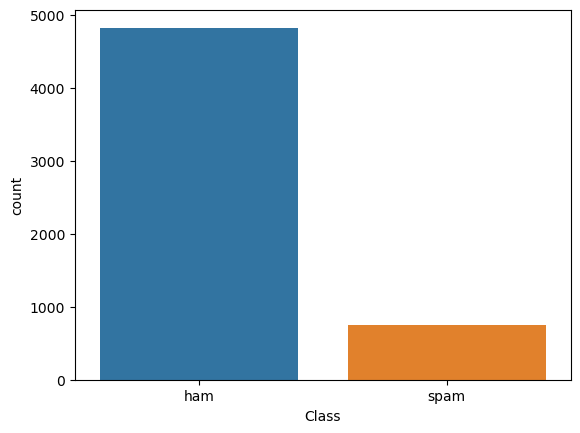

In [35]:
sns.countplot(data=df, x='Class')

In [36]:
df['Class'].value_counts()

Class
ham     4825
spam     747
Name: count, dtype: int64

In [37]:
d = {'ham': 0, 'spam': 1}

In [38]:
df['Class'] = df['Class'].map(d)    

In [39]:
df.head()

,Class,Text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [40]:
df.Text = df.Text.str.lower()

In [41]:
df['Text'] = df['Text'].str.replace('[^\w\s]','' , regex=True)

In [42]:
df['Text'] = df['Text'].str.replace('\n','')

In [43]:
df['Text'] = df['Text'].str.replace('\d+' , '' , regex=True)

In [44]:
df['Text'] = df['Text'].str.replace('\r' , '' , regex=True)

In [58]:
from wordcloud import WordCloud
from wordcloud import STOPWORDS
from PIL import Image
import numpy as np
from matplotlib import pyplot as plt

In [72]:
def wc(data, bgcolor):
    plt.figure(figsize = (10,10))
    mask = np.array(Image.open('heart.jpg'))
    wc = WordCloud(background_color = bgcolor, stopwords= STOPWORDS, mask=mask)
    wc.generate(' '.join(data))
    plt.imshow(wc)
    plt.axis('off')

In [73]:
ham = df[df['Class'] == 0]['Text']
spam = df[df['Class'] == 1]['Text']

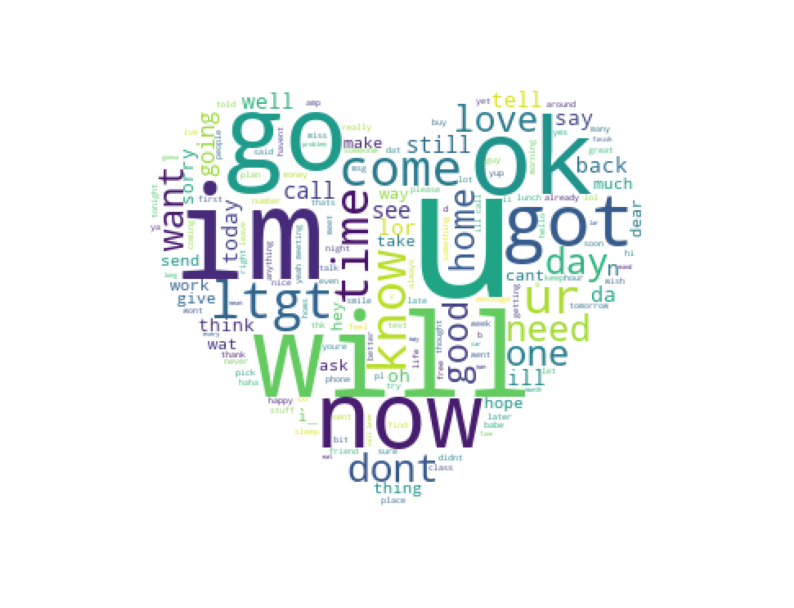

In [74]:
wc(ham, 'white')

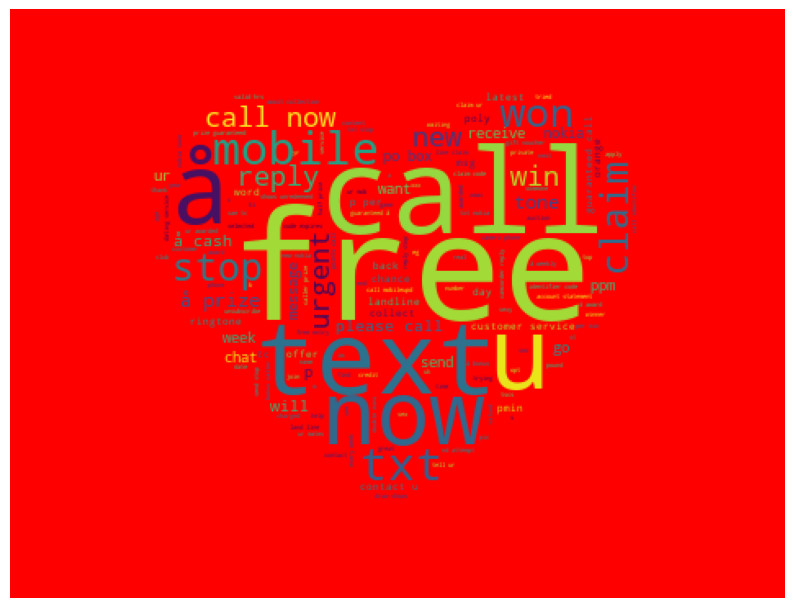

In [78]:
wc(spam, 'red')

In [79]:
x = df['Text']
y = df['Class']

In [96]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from nltk.stem import PorterStemmer
pr = PorterStemmer()

In [106]:
from sklearn.feature_extraction.text import CountVectorizer
from textblob import TextBlob

In [107]:
def lemmafn (text):
    words = TextBlob(text).words
    return [pr.stem(word) for word in words]   

In [108]:
vect = CountVectorizer(stop_words='english', ngram_range=(1,2), analyzer=lemmafn)

In [109]:
x = vect.fit_transform(x)


In [110]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0)

In [111]:
nb = MultinomialNB()

In [112]:
model = nb.fit(x_train, y_train)

In [113]:
pred = model.predict(x_test)

In [114]:
accuracy_score(y_test, pred)

0.9766816143497757